In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
np.random.seed(42)

num_samples = 1000

attendance = np.random.uniform(50, 100, num_samples)
study_hours = np.random.uniform(1, 10, num_samples)
family_income = np.random.uniform(20000, 150000, num_samples)
parent_education = np.random.choice([0, 1, 2], num_samples)
extra_curricular = np.random.choice([0, 1], num_samples)
sleep_hours = np.random.uniform(4, 9, num_samples)
school_type = np.random.choice([0, 1], num_samples)

In [10]:
final_grade = (
    0.3 * attendance +
    0.4 * study_hours +
    0.1 * family_income / 10000 +
    2 * parent_education +
    3 * extra_curricular +
    0.5 * sleep_hours - 2 * school_type
)
final_grade = np.clip(final_grade + np.random.normal(0, 5, num_samples), 0, 100)


In [11]:
df = pd.DataFrame({
    'attendance': attendance,
    'study_hours': study_hours,
    'family_income': family_income,
    'parent_education': parent_education,
    'extra_curricular': extra_curricular,
    'sleep_hours': sleep_hours,
    'school_type': school_type,
    'final_grade': final_grade
})

In [12]:
X = df.drop('final_grade', axis=1)
y = df['final_grade']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [16]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [17]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 4.450796218272134
Mean Squared Error (MSE): 31.28513922823694
R-squared (R²): 0.45338757765575943


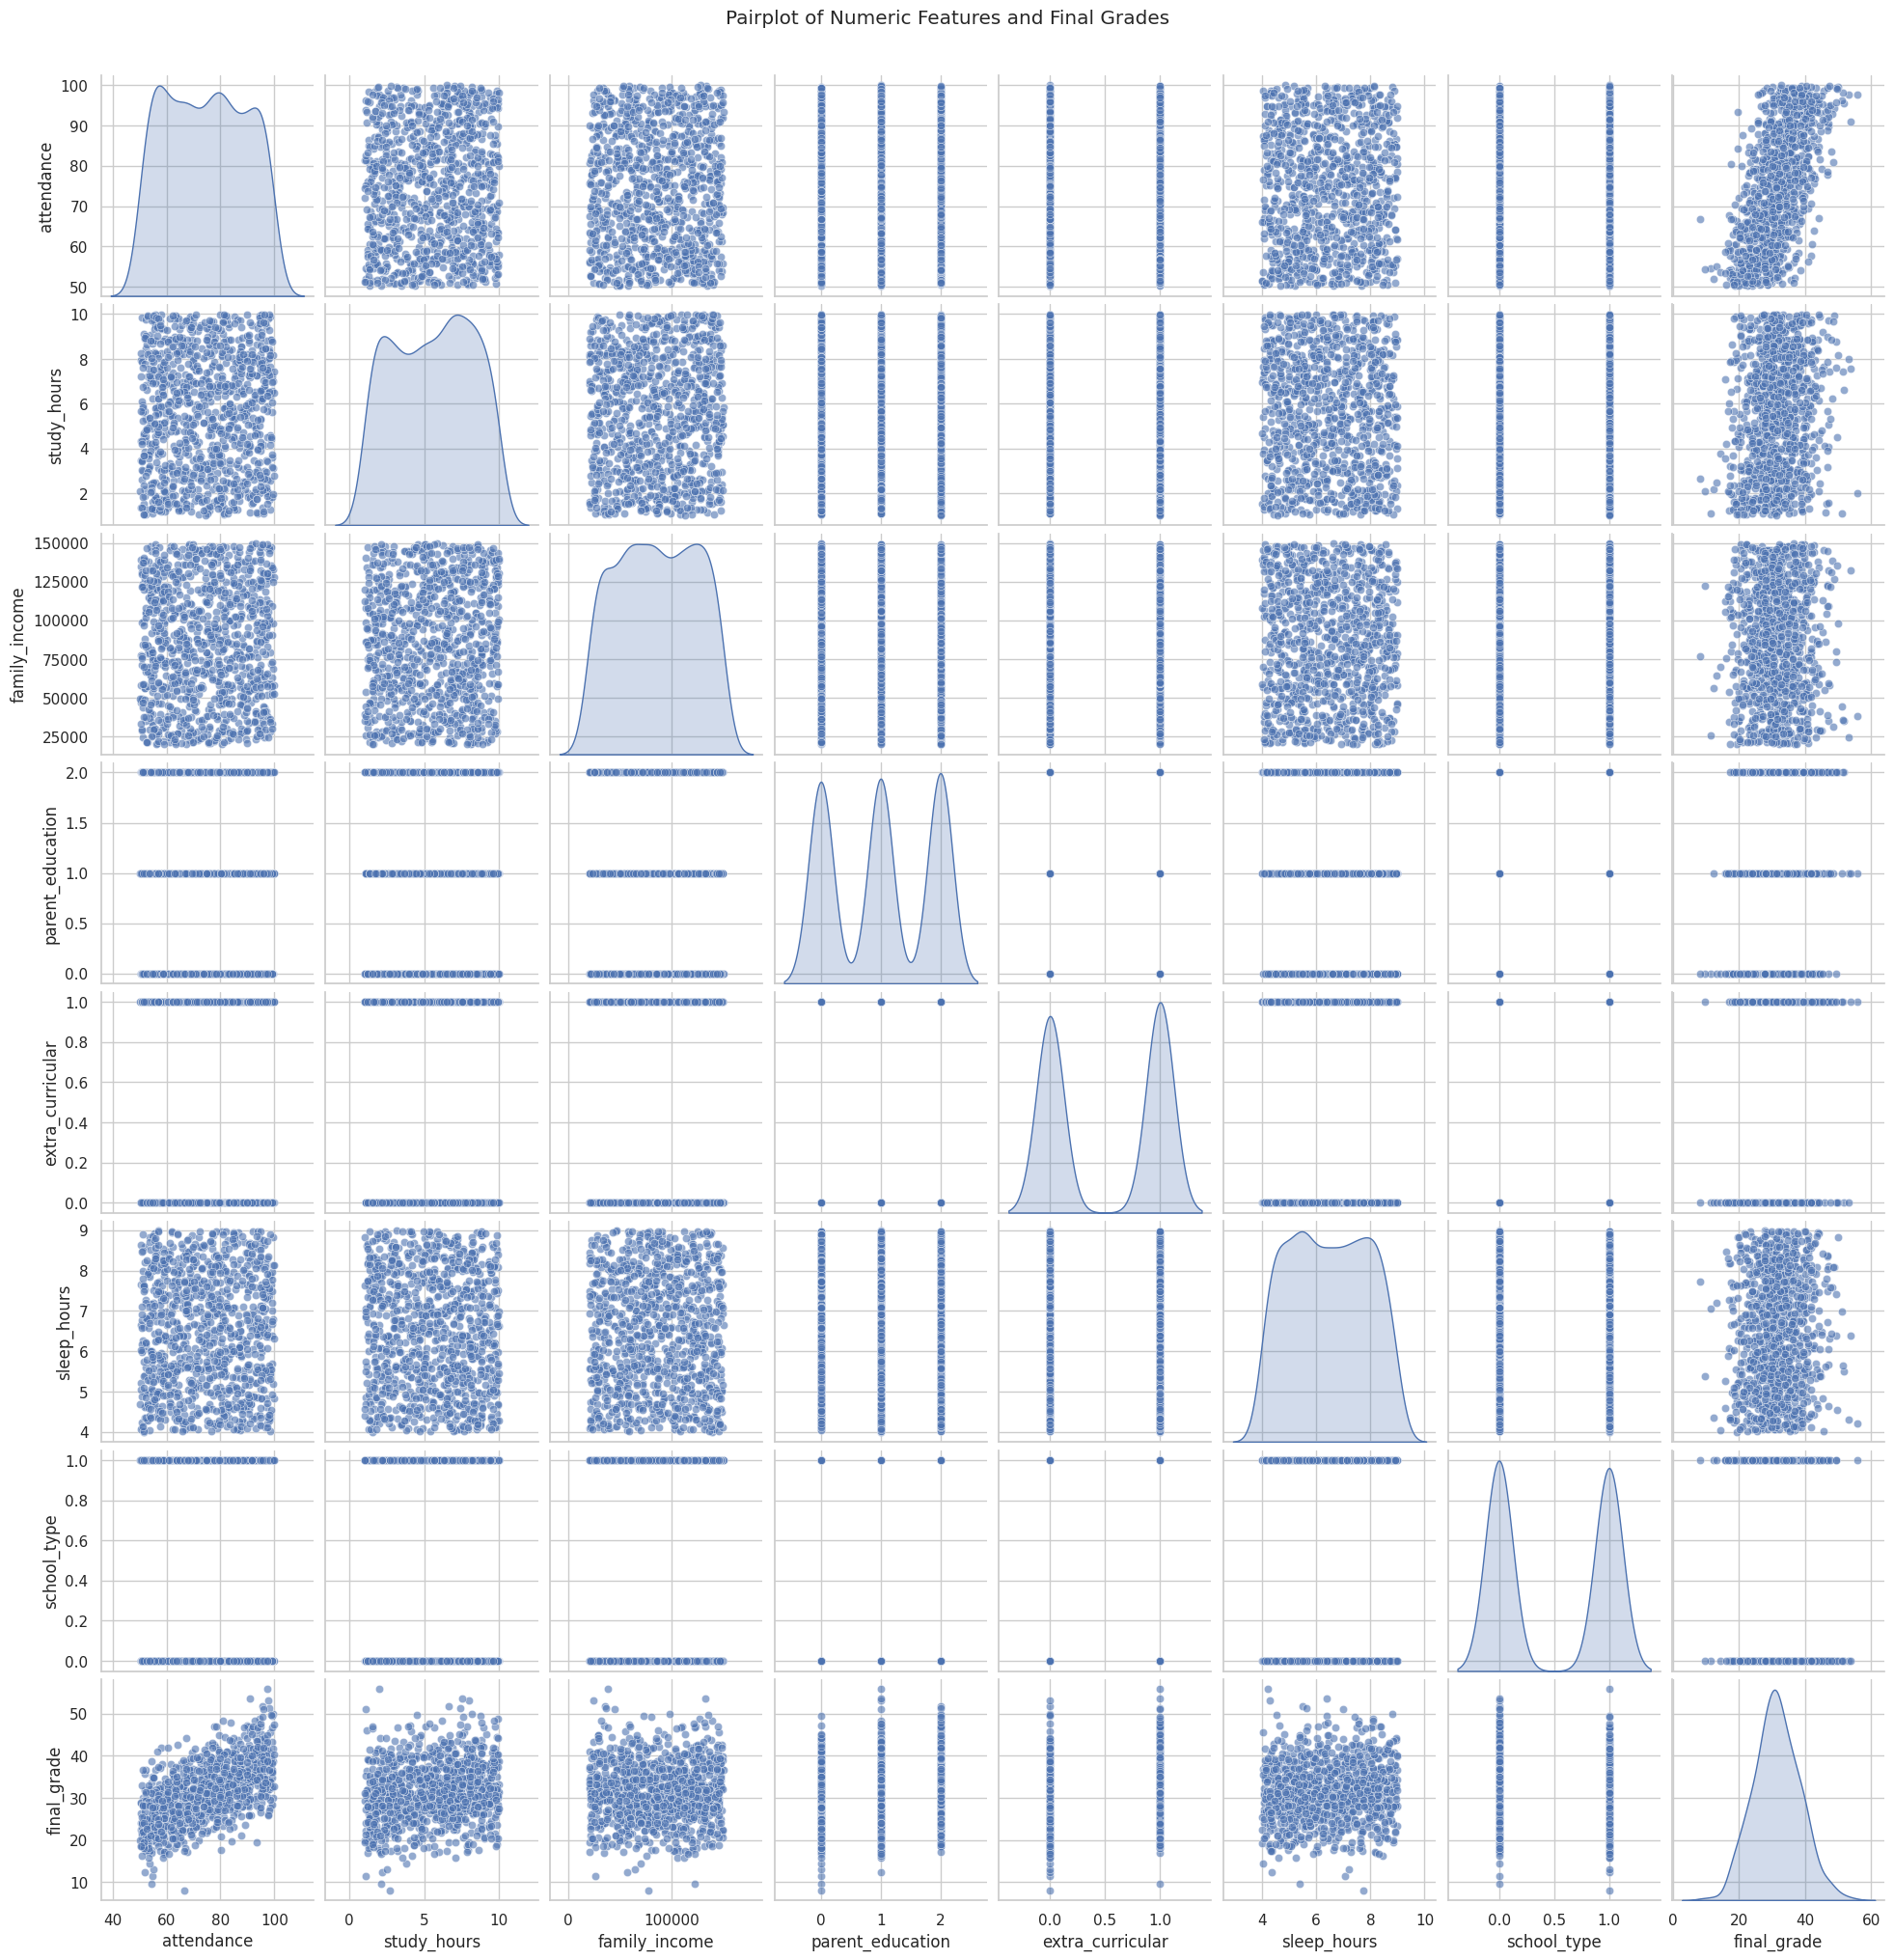

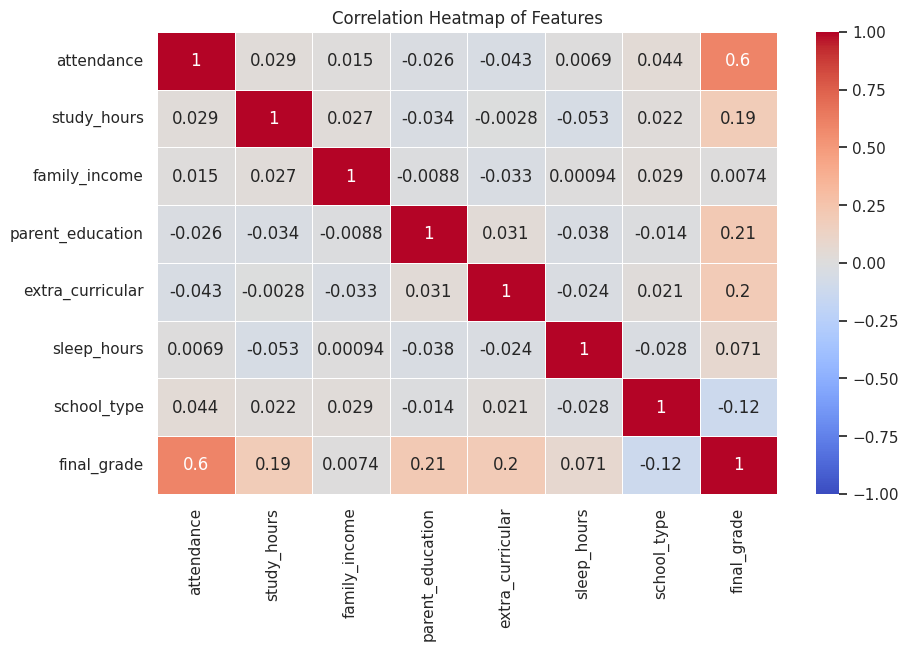

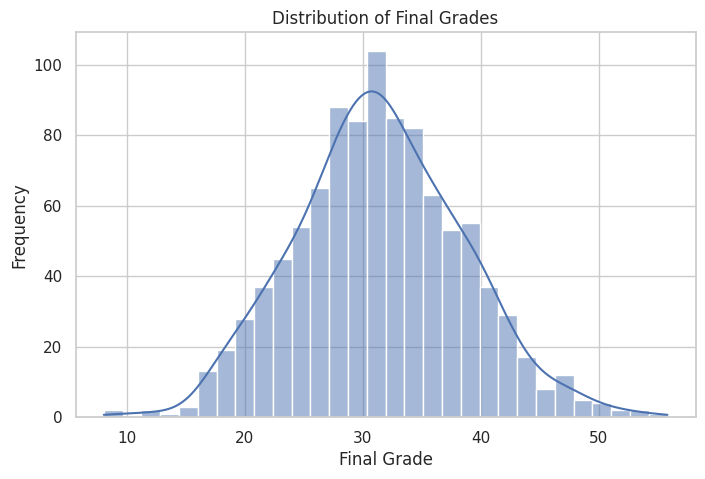

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

sns.pairplot(df[numeric_columns], diag_kind="kde", plot_kws={'alpha':0.6})
plt.suptitle('Pairplot of Numeric Features and Final Grades', y=1.02)
plt.show()

plt.figure(figsize=(10, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df['final_grade'], kde=True, bins=30)
plt.title('Distribution of Final Grades')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.show()
